## BRAIN TUMOR DETECTION

In [1]:
#importing the libraries
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#print folder components
os.listdir(r"C:\Users\HP\Desktop\Data Science\brain_tumor_dataset")

['no', 'yes']

In [6]:
#defining a function to classify, reshape, resize and plot image data 
classes = ['no','yes']
def cs_images(path,classes):
    imag = []
    label = []
    for i in classes:
        l1 = os.listdir(path+'/'+i)
        for j in l1:
            img = Image.open(path+'/'+i+'/'+j)
            img = img.resize(size = (28,28))
            img = img.convert('L')
            #img = img.reshape(50,50,1)
            #img = img.flatten()
            img = np.array(img)
            img = img.reshape(28,28,1)
            imag.append(img)
            label.append(classes.index(i))
            del(img)
    %matplotlib inline 
    plt.figure(figsize=(10, 10))
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(imag[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(imag),label

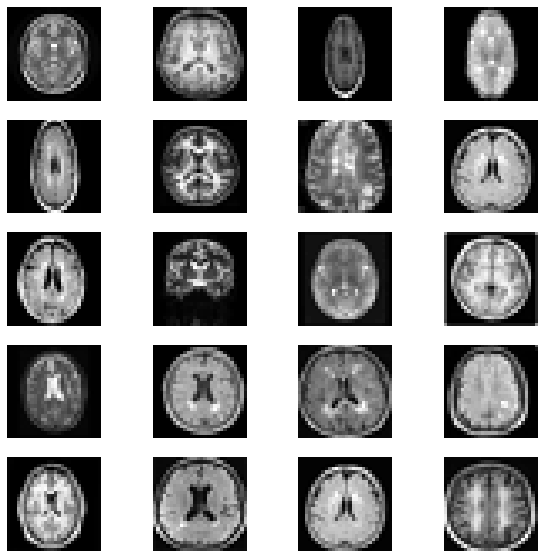

In [9]:
x,y = cs_images(r'C:\Users\HP\Desktop\Data Science\brain_tumor_dataset',classes)

In [11]:
#viewing the shape
x.shape

(253, 28, 28, 1)

In [12]:
#checking the length of y
len(y)

253

***checking various lengths and dimensions***

In [13]:
y[0:9]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [14]:
y[245:253]

[1, 1, 1, 1, 1, 1, 1, 1]

In [15]:
y[90:110]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [17]:
#converting y values to series
s = pd.Series(y)

In [18]:
#print the values
print(s)

0      0
1      0
2      0
3      0
4      0
      ..
248    1
249    1
250    1
251    1
252    1
Length: 253, dtype: int64


In [21]:
#check the unique values of s
s.unique()

array([0, 1], dtype=int64)

In [20]:
#count values
s.value_counts()

1    155
0     98
dtype: int64

***Train Test Split***

In [22]:
#splitting the datasets
x_train,x_test,y_train,y_test = train_test_split(x,s,test_size = 0.1,random_state = 1,shuffle = True)

In [23]:
#printing their shapes
print(x_train.shape, x_test.shape)

(227, 28, 28, 1) (26, 28, 28, 1)


In [27]:
#printing their lengths
print(len(x_train),len(x_test))

227 26


In [28]:
#printing their shapes
print(y_train.shape, y_test.shape)

(227,) (26,)


In [29]:
#printing their lengths
print(len(y_train),len(y_test))

227 26


***CNN Model Classification***

In [31]:
#import the libraries
from tensorflow.keras.layers import Dropout,BatchNormalization,AveragePooling2D
from tensorflow.keras.layers import MaxPool2D
model = Sequential()
#cnn
"""ConvLayer_1"""
model.add(Conv2D(6,activation = "tanh",kernel_size=5,strides = 1,input_shape = (28,28,1),padding = "same"))
#model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = 2,strides=2,padding = "valid"))
"""ConvLayer_2"""
model.add(Conv2D(16,activation = "tanh",kernel_size=5,strides = 1,padding = "valid"))
#model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = 2,strides=2,padding = "valid"))
"""ConvLayer_3"""
model.add(Conv2D(120,activation = "tanh",kernel_size=5,strides = 1,padding = "valid"))
model.add(Flatten())
model.add(Dense(84,activation="tanh"))
#model.add(Dense(500,activation = "tanh"))
model.add(Dense(2,activation = "softmax"))

In [32]:
#building the cnn model
"""from tensorflow.keras.layers import MaxPool2D
model = Sequential()
model.add(Conv2D(16,activation = 'relu',kernel_size = 3,input_shape = (32,32,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,activation = 'relu',kernel_size = 3))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))"""

"from tensorflow.keras.layers import MaxPool2D\nmodel = Sequential()\nmodel.add(Conv2D(16,activation = 'relu',kernel_size = 3,input_shape = (32,32,1)))\nmodel.add(MaxPool2D(2,2))\nmodel.add(Conv2D(32,activation = 'relu',kernel_size = 3))\nmodel.add(MaxPool2D(2,2))\nmodel.add(Flatten())\nmodel.add(Dense(100,activation = 'relu'))\nmodel.add(Dense(2,activation = 'softmax'))"

In [33]:
#summarize model performance
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

***Compilation***

In [34]:
#compilling the model
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ['accuracy'])

In [35]:
#fit the model to the splitted set
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
8/8 [==============================] - 6s 34ms/step - loss: 0.9571 - accuracy: 0.5463
Epoch 2/10
8/8 [==============================] - 0s 18ms/step - loss: 0.6043 - accuracy: 0.6696
Epoch 3/10
8/8 [==============================] - 0s 16ms/step - loss: 0.5048 - accuracy: 0.7930
Epoch 4/10
8/8 [==============================] - 0s 15ms/step - loss: 0.4849 - accuracy: 0.7841
Epoch 5/10
8/8 [==============================] - 0s 15ms/step - loss: 0.4537 - accuracy: 0.7930
Epoch 6/10
8/8 [==============================] - 0s 15ms/step - loss: 0.4379 - accuracy: 0.7930
Epoch 7/10
8/8 [==============================] - 0s 17ms/step - loss: 0.3949 - accuracy: 0.8238
Epoch 8/10
8/8 [==============================] - 0s 23ms/step - loss: 0.4244 - accuracy: 0.8194
Epoch 9/10
8/8 [==============================] - 0s 18ms/step - loss: 0.3512 - accuracy: 0.8458
Epoch 10/10
8/8 [==============================] - 0s 17ms/step - loss: 0.3187 - accuracy: 0.8634


In [36]:
#predicting using the model
y_pred = np.argmax(model.predict(x_test),axis=1)

1/1 [==============================] - 0s 171ms/step


In [38]:
y_pred[0:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [39]:
y_test[0:5]

67     0
252    1
213    1
243    1
91     0
dtype: int64

In [40]:
_,acc = model.evaluate(x_test,y_pred)

1/1 [==============================] - 0s 375ms/step - loss: 0.2381 - accuracy: 1.0000


In [45]:
print("loss is :",_)

loss is : 0.23808850347995758


In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7692307692307693

## THE MODEL IS READY FOR DEPLOYTMENT ##